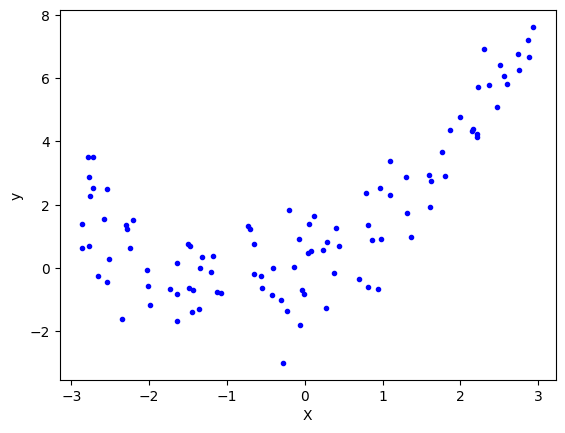

In [9]:
import numpy as np
import matplotlib.pyplot as plt 
m = 100
X = 6*np.random.rand(m,1) - 3
y = 0.5*X**2 + X + np.random.randn(m,1)

plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [10]:
# 将原始特征转换为多项式特征，从而帮助线性模型捕捉数据中的非线性关系。
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
# 生成平方项
X_poly = poly_features.fit_transform(X)


In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
# b偏置参数
print(lin_reg.intercept_)
# w权重参数
print(lin_reg.coef_)

[-0.05398293]
[[0.95207026 0.55620177]]


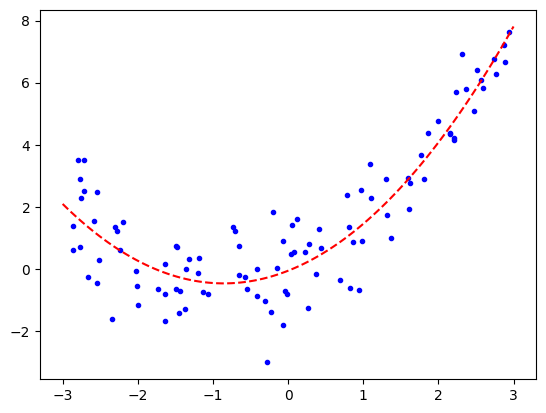

In [12]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.fit_transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X,y,'b.')
plt.plot(X_new,y_new,'r--')
plt.show()

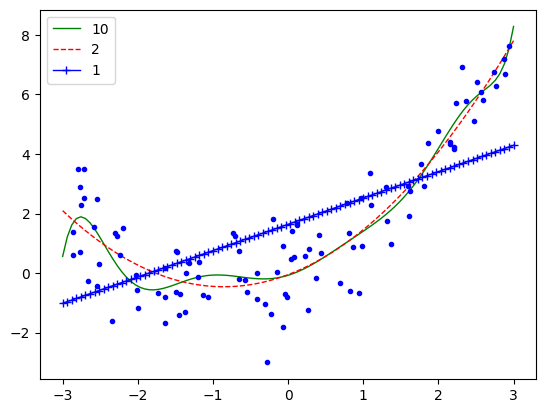

In [13]:
# 流水线
from sklearn.pipeline import Pipeline
# 标准化
from sklearn.preprocessing import StandardScaler
for style,width,degree in (('g-',1,10) , ('r--',1,2),('b-+',1,1)):
    poly_features = PolynomialFeatures(degree=degree,include_bias=False)
    std = StandardScaler()
    lin_reg = LinearRegression()
    # 流水线
    poly_reg = Pipeline([
        ('poly_features',poly_features), # 特征选择
        ('StandardScaler',std),  # 标准化
        ('lin_reg',lin_reg)  # 拟合模型
    ])
    poly_reg.fit(X,y)
    y_new_2 = poly_reg.predict(X_new)
    plt.plot(X_new,y_new_2,style,label = str(degree) ,linewidth = width)
plt.plot(X,y,'b.')
plt.legend()
plt.show()

#### 数据样本数据对训练结果的影响

In [14]:
# 均方差损失函数 MSE    开根号 RMES
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=0)
    train_errors , val_errors = [] , []
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(y_val)
        train_errors.append(mean_squared_error(y_train_pred[:m],y_train[:m]))
        val_errors.append(mean_squared_error(y_val_pred,y_val))
    plt.plot(np.sqrt(train_errors),'r--',label = 'train_error')
    plt.plot(np.sqrt(val_errors),'b-+',label = 'val_error')
    plt.legend()

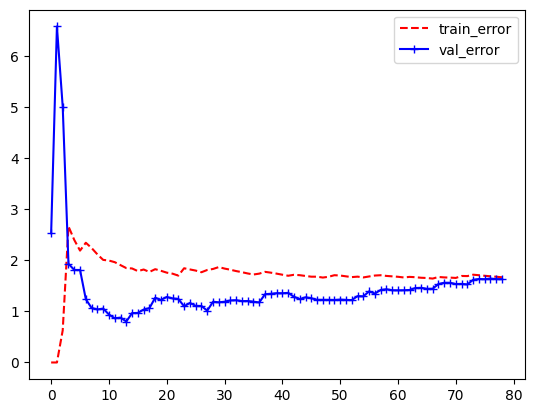

In [15]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg , X,y)
plt.show()

##### 模型复杂度对训练结果的影响

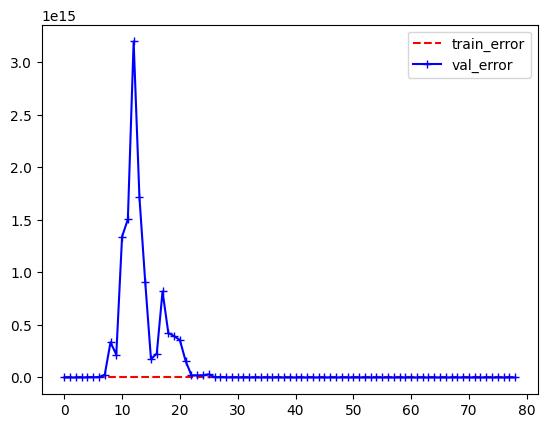

In [17]:
poly_reg = Pipeline([
        ('poly_features',PolynomialFeatures(degree=20,include_bias= False)), # 特征选择
        ('lin_reg',LinearRegression())  # 拟合模型
    ])
plot_learning_curves(poly_reg,X,y)
plt.show()
